## Factors Influencing U.S. Home Prices

#### Aim: To build a model using publicly available data for key *supply-demand* factors that could influence U.S. Home Prices. 

##### Importing the necessary liabraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action = "ignore")

##### Reading the Dataset

In [2]:
df = pd.read_excel("DataSet2_HomeLLC.xlsx")

##### Printing the Dataset 

In [3]:
df

,observation_date,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI,Home_price_Index
0,2000-01-01,3.966667,10250.95200,1598.333333,282398.416667,0,681,8.037045e+05,76.636585,8.053462,169.575000,104.777000
1,2001-01-01,4.741667,10581.92900,1637.166667,285225.166667,1,696,8.397783e+05,76.836585,6.967885,176.350000,113.185500
2,2002-01-01,5.783333,10929.10825,1749.000000,287954.583333,0,626,8.483395e+05,76.936585,6.537308,180.258333,122.287667
3,2003-01-01,5.991667,11456.44950,1888.416667,290626.250000,0,611,8.905208e+05,77.036585,5.826981,184.800000,133.741500
4,2004-01-01,5.541667,12217.19575,2057.583333,293262.333333,0,595,9.892200e+05,77.487805,5.839231,189.541667,150.464333
5,2005-01-01,5.083333,13039.19700,2160.083333,295992.916667,0,667,1.114935e+06,77.487805,5.866731,195.716667,171.779333
6,2006-01-01,4.608333,13815.58300,1843.666667,298817.666667,0,649,1.164342e+06,77.687805,6.413269,203.158333,183.481917
7,2007-01-01,4.616667,14474.22700,1391.500000,301696.166667,0,582,1.147742e+06,77.987805,6.337308,209.582583,179.943667
8,2008-01-01,5.800000,14769.86150,895.833333,304543.083333,1,674,1.075923e+06,78.039024,6.027170,216.255083,164.062333
9,2009-01-01,9.283333,14478.06675,582.000000,307240.083333,1,657,9.122430e+05,78.390244,5.036538,217.057833,148.552750


In [4]:
# df.head()
# df.tail()

##### Understanding the datatypes of every feature

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observation_date   23 non-null     datetime64[ns]
 1   Unemployment_RATE  23 non-null     float64       
 2   GDP                23 non-null     float64       
 3   PERMIT             23 non-null     float64       
 4   POPTHM             23 non-null     float64       
 5   Recession          23 non-null     int64         
 6   house_tax          23 non-null     int64         
 7   TTLCONS            23 non-null     float64       
 8   Life_expectancy    23 non-null     float64       
 9   MORTGAGE_RATE_US   23 non-null     float64       
 10  CPI                23 non-null     float64       
 11  Home_price_Index   23 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 2.3 KB


##### Checking the duplicate values in the dataset

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

##### Checking the null values in the dataset

In [7]:
df.isna().any().any()

False

##### Descriptive statistics of the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unemployment_RATE,23.0,5.857246e+00,1.829673,3.600000,4.612500,5.400000e+00,6.758333e+00,9.608333e+00
GDP,23.0,1.632347e+04,4194.127876,10250.952000,13427.390000,1.559973e+04,1.908622e+04,2.546272e+04
PERMIT,23.0,1.355076e+03,461.817896,582.000000,1020.041667,1.385667e+03,1.703000e+03,2.160083e+03
POPTHM,23.0,3.109527e+05,16572.535570,282398.416667,297405.291667,3.122952e+05,3.257345e+05,3.335950e+05
Recession,23.0,1.739130e-01,0.387553,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
house_tax,23.0,1.577043e+03,1118.654447,582.000000,643.500000,6.910000e+02,2.610000e+03,3.423000e+03
TTLCONS,23.0,1.110379e+06,286937.197393,790567.750000,872027.833333,1.075923e+06,1.252419e+06,1.847810e+06
Life_expectancy,23.0,7.790520e+01,0.819869,76.329268,77.158537,7.803902e+01,7.864024e+01,7.884146e+01
MORTGAGE_RATE_US,23.0,5.010088e+00,1.345336,2.960000,3.955673,4.689808e+00,5.946950e+00,8.053462e+00
CPI,23.0,2.248660e+02,35.206705,169.575000,199.437500,2.191043e+02,2.476031e+02,3.008020e+02


#### observation _date column in not necessary
so that we can drop the column


In [9]:
df.drop("observation_date", axis=1, inplace = True)
df.head()

,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI,Home_price_Index
0,3.966667,10250.95200,1598.333333,282398.416667,0,681,803704.500000,76.636585,8.053462,169.575000,104.777000
1,4.741667,10581.92900,1637.166667,285225.166667,1,696,839778.333333,76.836585,6.967885,176.350000,113.185500
2,5.783333,10929.10825,1749.000000,287954.583333,0,626,848339.500000,76.936585,6.537308,180.258333,122.287667
3,5.991667,11456.44950,1888.416667,290626.250000,0,611,890520.833333,77.036585,5.826981,184.800000,133.741500
4,5.541667,12217.19575,2057.583333,293262.333333,0,595,989220.000000,77.487805,5.839231,189.541667,150.464333


##### As no categorical data is present in the data set we don't need to perform any catogorical encoding technique such as One-Hot-Encoding

# Lets do some EDA
##### lets see how our data is distributed 

<Axes: xlabel='Recession', ylabel='count'>

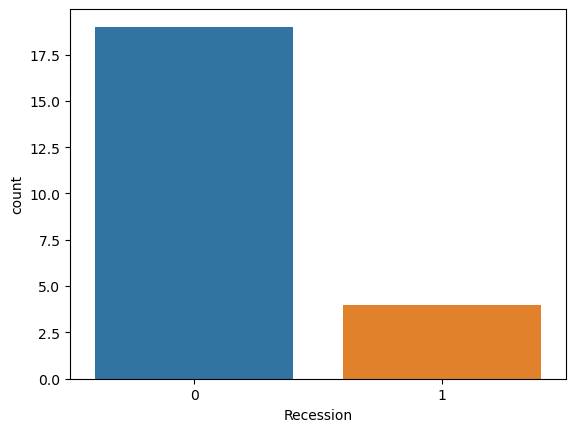

In [10]:
import seaborn as sns
sns.countplot(x='Recession', data=df) 

In [11]:
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

In [12]:
xpos = np.arange(len(years))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

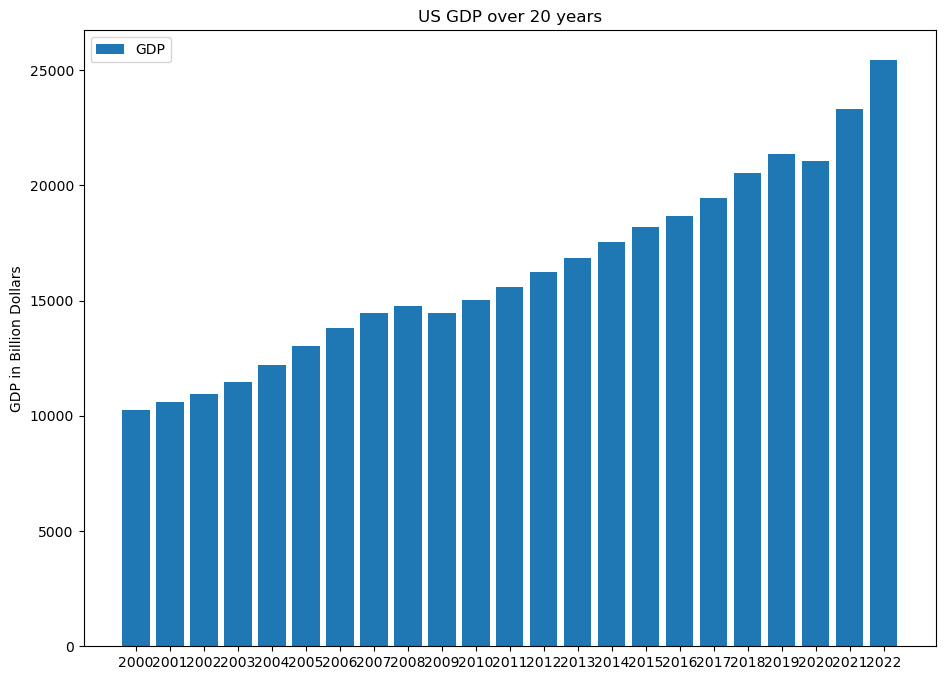

In [13]:
plt.figure(figsize=(11,8))

plt.bar(xpos,df.GDP, label="GDP",width = 0.8)

plt.xticks(xpos,years)
plt.ylabel("GDP in Billion Dollars")
plt.title('US GDP over 20 years')
plt.legend()

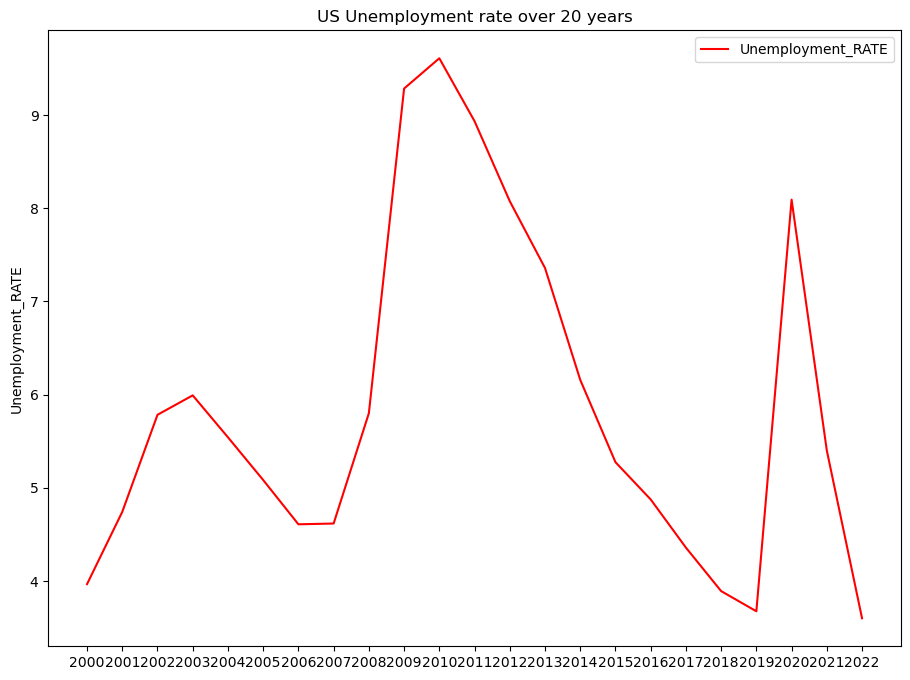

In [14]:
plt.figure(figsize=(11,8))

plt.plot(xpos,df.Unemployment_RATE, label="Unemployment_RATE",color='r')

plt.xticks(xpos,years)
plt.ylabel("Unemployment_RATE")
plt.title('US Unemployment rate over 20 years')
plt.legend()

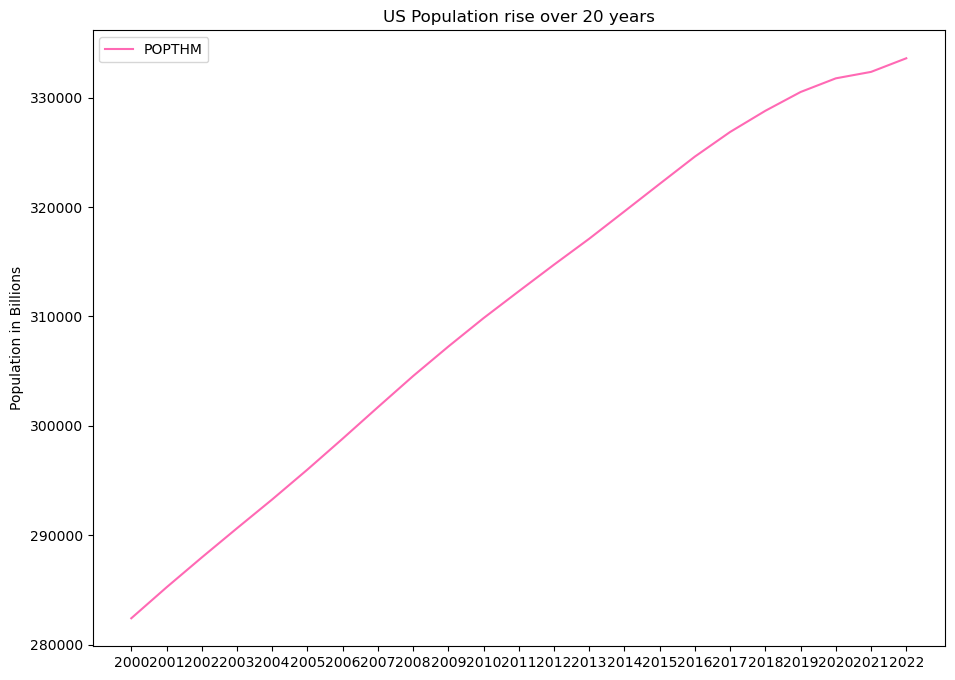

In [15]:
plt.figure(figsize=(11,8))

plt.plot(xpos,df.POPTHM, label="POPTHM",color='hotpink')

plt.xticks(xpos,years)
plt.ylabel("Population in Billions")
plt.title('US Population rise over 20 years')
plt.legend()

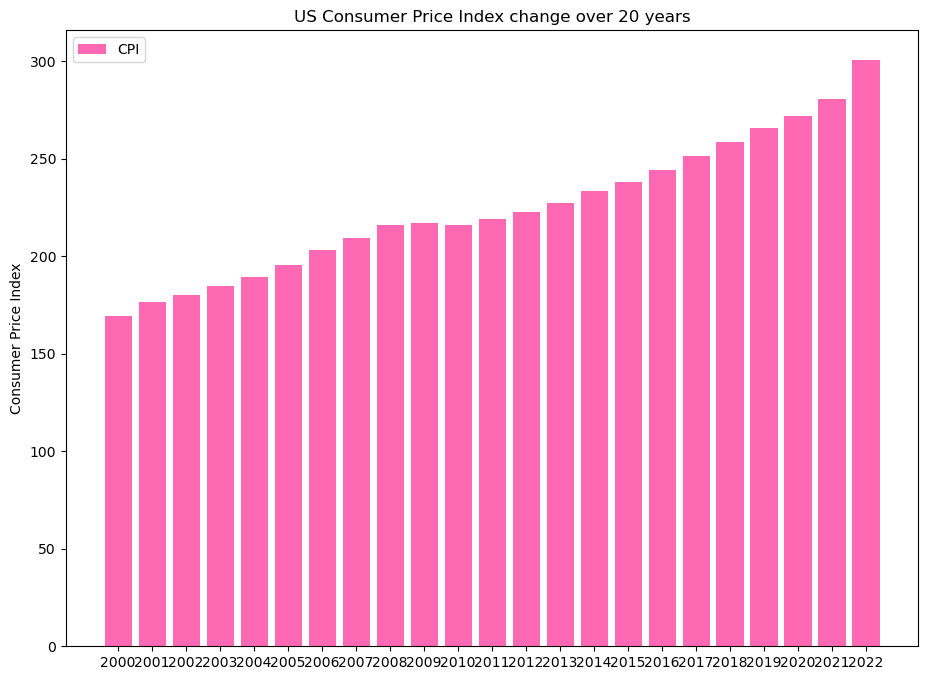

In [16]:
plt.figure(figsize=(11,8))

plt.bar(xpos,df.CPI, label="CPI",color='hotpink')

plt.xticks(xpos,years)
plt.ylabel("Consumer Price Index")
plt.title('US Consumer Price Index change over 20 years')
plt.legend()

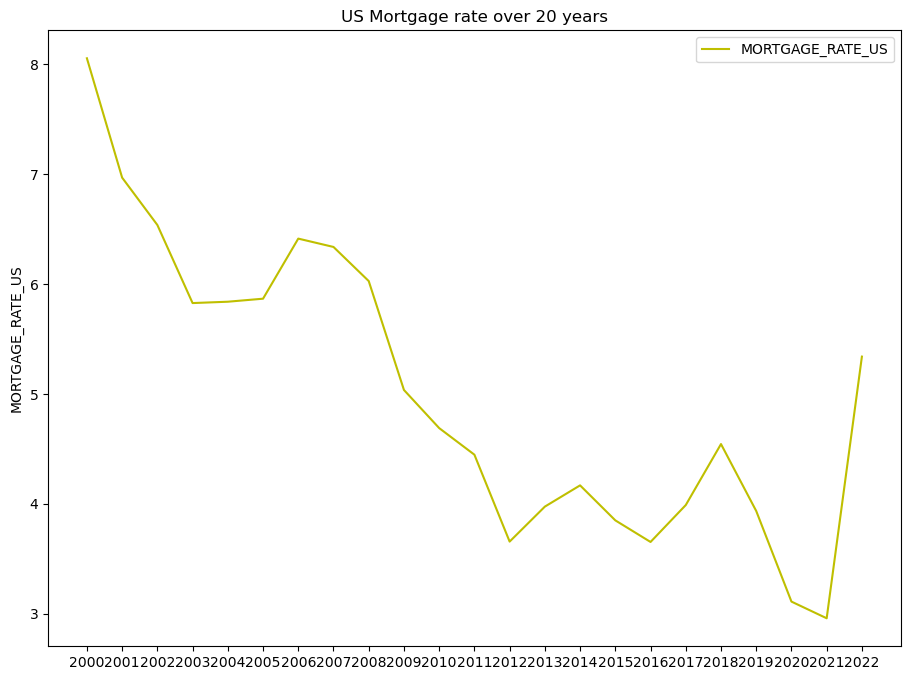

In [17]:
plt.figure(figsize=(11,8))

plt.plot(xpos,df.MORTGAGE_RATE_US, label="MORTGAGE_RATE_US",color='y')

plt.xticks(xpos,years)
plt.ylabel("MORTGAGE_RATE_US")
plt.title('US Mortgage rate over 20 years')
plt.legend()

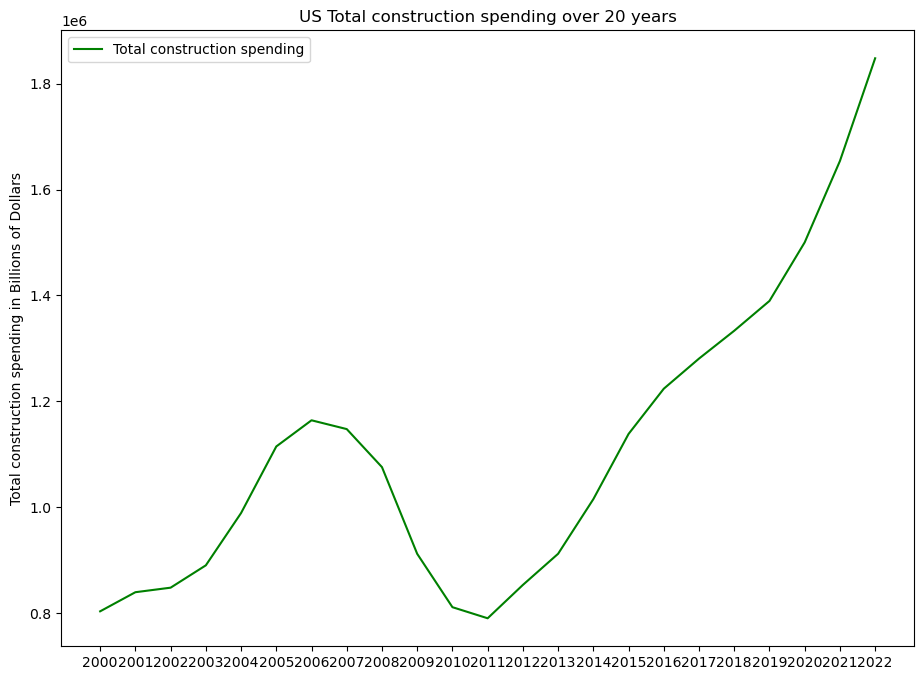

In [18]:
plt.figure(figsize=(11,8))

plt.plot(xpos,df.TTLCONS, label="Total construction spending",color='g')

plt.xticks(xpos,years)
plt.ylabel("Total construction spending in Billions of Dollars")
plt.title('US Total construction spending over 20 years')
plt.legend()

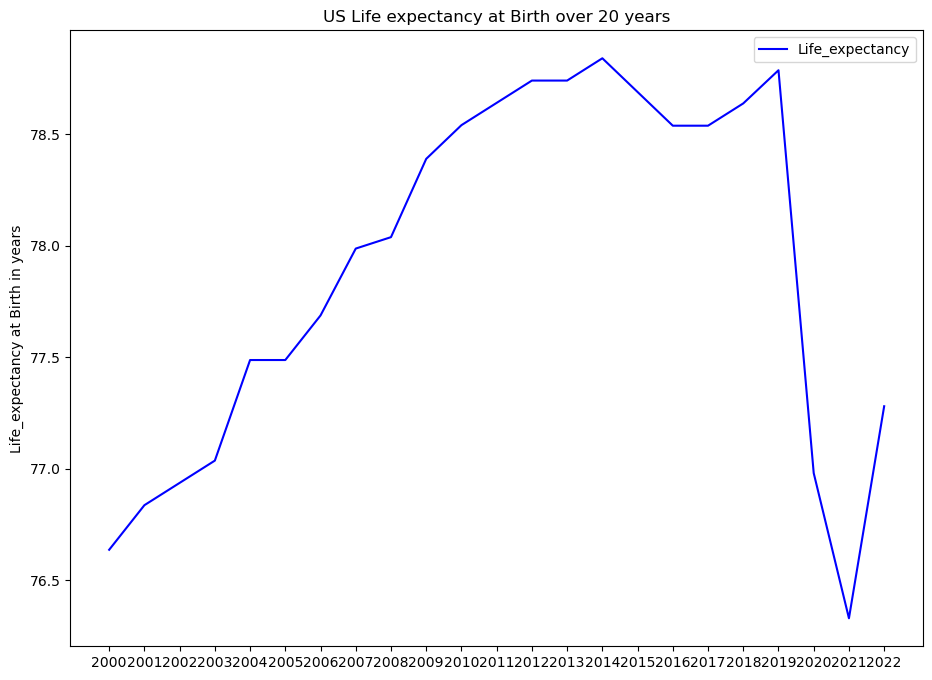

In [19]:
plt.figure(figsize=(11,8))
plt.plot(xpos,df.Life_expectancy, label="Life_expectancy",color='b')

plt.xticks(xpos,years)
plt.ylabel("Life_expectancy at Birth in years")
plt.title('US Life expectancy at Birth over 20 years')
plt.legend()

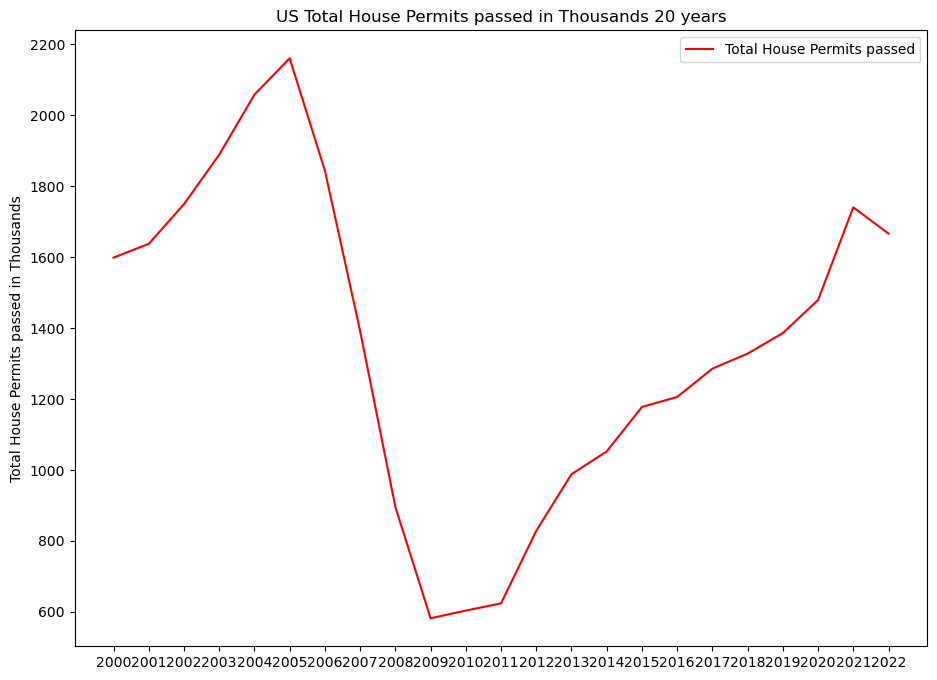

In [20]:
plt.figure(figsize=(11,8))
plt.plot(xpos,df.PERMIT, label="Total House Permits passed",color='r')

plt.xticks(xpos,years)
plt.ylabel("Total House Permits passed in Thousands")
plt.title('US Total House Permits passed in Thousands 20 years')
plt.legend()

# Let's build a model now

In [21]:
df.shape

(23, 11)

In [22]:
X = df.drop(['Home_price_Index'],axis='columns')
X.head(3)

,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI
0,3.966667,10250.95200,1598.333333,282398.416667,0,681,803704.500000,76.636585,8.053462,169.575000
1,4.741667,10581.92900,1637.166667,285225.166667,1,696,839778.333333,76.836585,6.967885,176.350000
2,5.783333,10929.10825,1749.000000,287954.583333,0,626,848339.500000,76.936585,6.537308,180.258333


In [23]:
X.shape

(23, 10)

In [24]:
y = df.Home_price_Index
y.head(3)

0    104.777000
1    113.185500
2    122.287667
Name: Home_price_Index, dtype: float64

In [25]:
len(y)

23

##### Splitting the dataset into train and test 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [27]:
# Here's what each parameter means:
# X: contains the features (input variables) of the dataset. These are the variables used to make predictions.
# y: Contains the target variable or labels that I want the model to predict. (Home_price_Index)
# test_size: This parameter specifies the proportion of the dataset that should be allocated for testing. 
        # Here, it's set to 0.2, which means 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state: This parameter is used to seed the random number generator. It ensures that the data split is reproducible. 
        # Setting it to a specific value, eg: 10, means that every time I run the code with the same dataset, I get the same split. 
        # If I don't specify a random state, the split will be different each time I run the code.

##### Trying the linear Regression model with above train and test dataset

In [28]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) # fits (or trains) the linear regression model using the training data.
lr_clf.score(X_test,y_test) # calculates the R-squared score of the linear regression model on the testing data. 


0.9892239736391725

In [29]:
# The fit method calculates the coefficients and intercept of the linear regression model that best fits the training data. 
        #In other words, it learns the relationship between the input features (X_train) and the target variable (y_train).
# The score method computes the R-squared (coefficient of determination) score, which is a measure of how well the linear regression model fits the testing data. 
        # R-squared values range from 0 to 1, where a higher value indicates a better fit. 
        # R-squared of 1 means the model perfectly predicts the target variable.
        # while an R-squared of 0 means the model's predictions are no better than simply predicting the mean of the target variable.
# Here the R-squared value of 0.988 means that 98.8% of the variance in the target variable is explained by the model, and the remaining 0.12% is unexplained (possibly due to noise or other factors not included in the model)

In [30]:
lr_y_pred = lr_clf.predict(X_test)
lr_y_pred

array([174.22028641, 108.1033353 , 180.41761016, 122.13208976,
       136.86294895])

In [31]:
# Uses a trained linear regression model to make predictions for a set of testing data and stores these predictions in the lr_y_pred variable.
# The predict method takes the testing data (X_test) as input and returns an array or series of predicted values. 
# These predicted values represent the model's estimates for the target variable based on the provided input features

## Lets try K-fold cross validation to measure accuracy of our LinearRegression model

In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.98335057, 0.99148488, 0.92416047, 0.96147441, 0.98899417])

In [ ]:
# ShuffleSplit is a cross-validation technique that shuffles the data and splits it into train and test sets multiple times to evaluate a model's performance.
# cross_val_score function, which is used to perform cross-validation and obtain scores for each fold of the cross-validation.
# n_splits: This specifies the number of times the data will be shuffled and split into train and test sets. 
        #In this case, it's set to 5, which means the data will be split into 5 different train-test sets for cross-validation.


##### We can see that in 5 iterations we get a score above 90% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Let's Find out the best model using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, 1, 2],
                'positive': [False, True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

results = find_best_model_using_gridsearchcv(X, y)
print(results)


               model  best_score  \
0  linear_regression    0.969893   
1              lasso    0.936643   
2      decision_tree    0.194097   

                                         best_params  
0  {'copy_X': True, 'fit_intercept': True, 'n_job...  
1                {'alpha': 2, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  


In [ ]:
# this code defines a Python function named find_best_model_using_gridsearchcv that takes two arguments, X (the feature matrix) and y (the target variable).

# Define a Dictionary of Models and Hyperparameters:
# algos: This is a dictionary that specifies the models to be evaluated along with the hyperparameters to be tuned. In this case, three models are considered:
        # Linear Regression with hyperparameters 'copy_X', 'fit_intercept', 'n_jobs', and 'positive'.
        # Lasso Regression with hyperparameters 'alpha' and 'selection'.
        # Decision Tree Regression with hyperparameters 'criterion' and 'splitter'.
        # Initialize an Empty List: scores is an empty list that will store the results of model evaluation.

# cv: This defines a cross-validation strategy using ShuffleSplit. 
         # It will perform 5 splits of the data (n_splits=5) with a test size of 20% (test_size=0.2) and a fixed random state for reproducibility (random_state=0).

# gs.best_score_ represents the best score achieved by the model during cross-validation.
# gs.best_params_ stores the best hyperparameters found for the model.
# Append Results to the scores List: The code appends a dictionary containing the model name, best score, and best hyperparameters to the scores list for each model.

# The function returns the results DataFrame.
# print the return output

In [1]:
(0.98335057 + 0.99148488 + 0.92416047 + 0.96147441 + 0.98899417)/5  #Average of 5 iteration is given in above columns

0.9698929

##### From above computation  we can say that linear regression is giving the best score . So will continue to use the same model to predict the housing prices  

## Let's test the model for few properties

In [37]:
def predict_price(Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI):    

    x = np.zeros(10)
    x[0] = Unemployment_RATE
    x[1] = GDP
    x[2] = PERMIT
    x[3] = POPTHM
    x[4] = Recession
    x[5] = house_tax
    x[6] = TTLCONS
    x[7] = Life_expectancy
    x[8] = MORTGAGE_RATE_US
    x[9] = CPI
    
    

    return lr_clf.predict([x])[0]

In [ ]:
# This code defines a Python function named predict_price that takes ten input variables as arguments 
        #and uses a trained machine learning model (lr_clf) to make a prediction. 

##### Lets use some randomly taken values to check the prection

In [38]:
predict_price('3',14474.227,1392,312295,0,657,912243,77.987805,6.03,203.158) #These values are randomly taken

103.24202887375503

### Let's check the correlation of the features

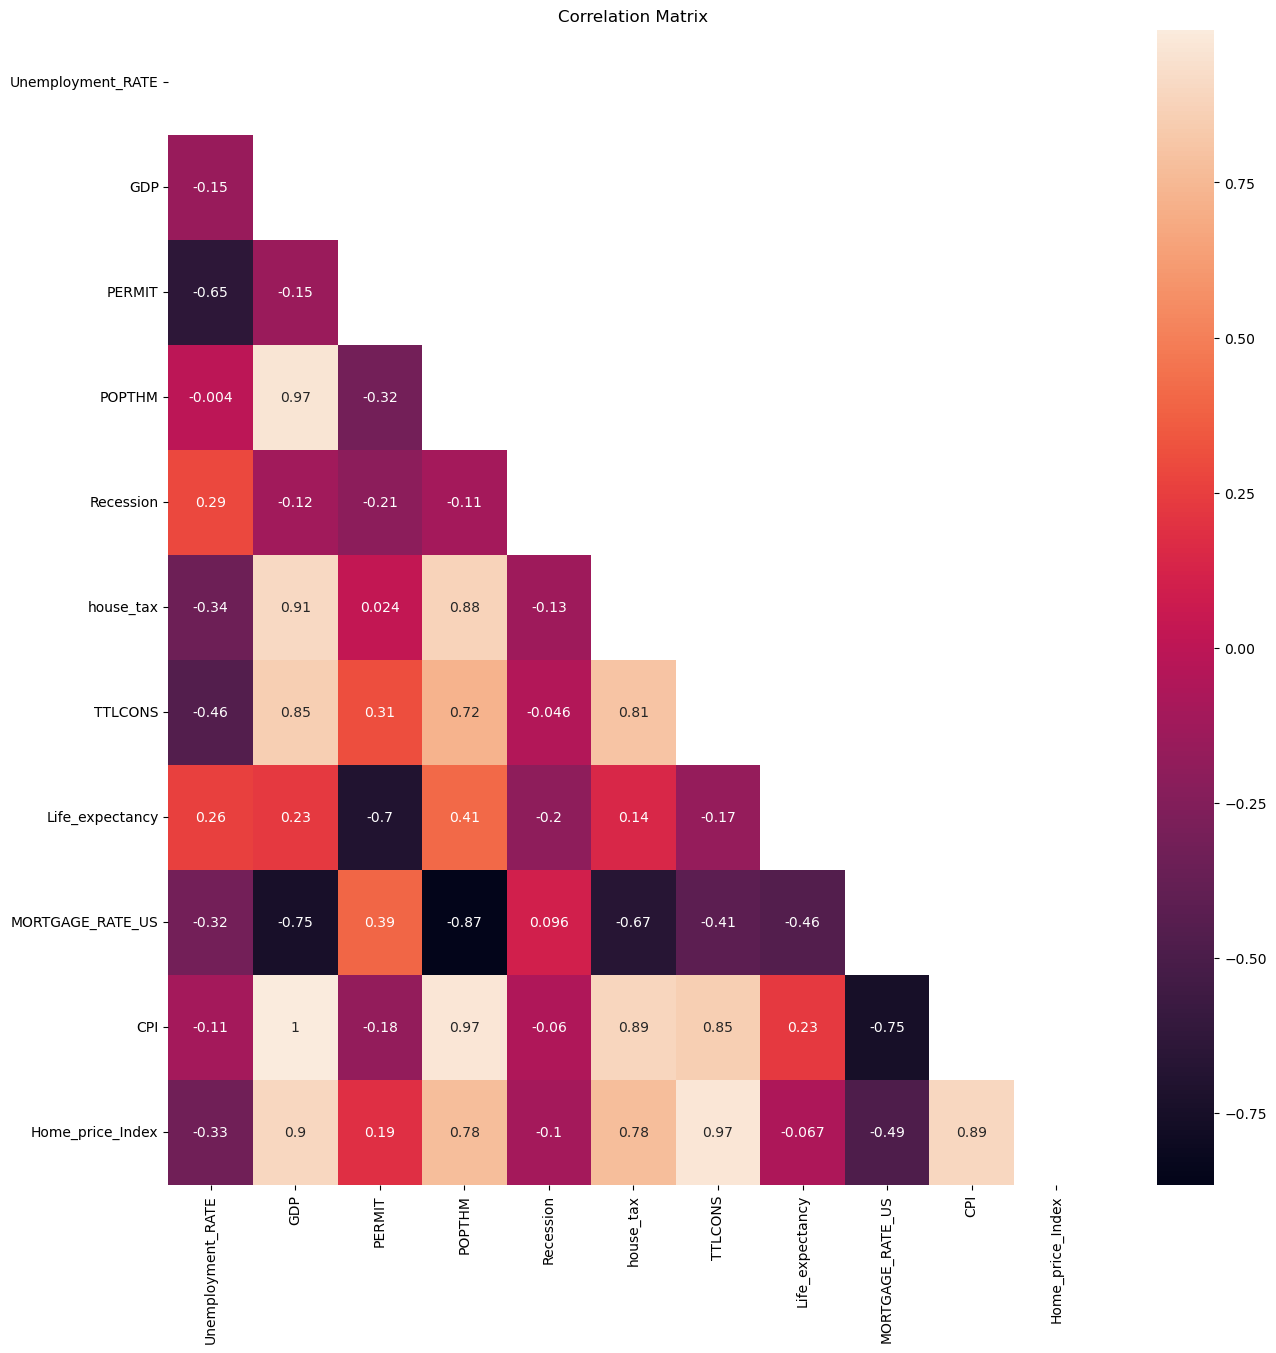

In [43]:
#Get the correlation matrix
import seaborn as sns
corr=df.corr()

# Getting the Upper Triangle of the co-relation matrix
UpperT = np.triu(corr)
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=UpperT,annot=True)
plt.show()

##### Let's calculate mean square error, mean absolute error and R2 score for linear regression algorithm

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
print(mean_squared_error(y_test, lr_y_pred))
print(math.sqrt(mean_squared_error(y_test, lr_y_pred)))

7.540896772618654
2.7460693313568494


In [ ]:
# calculates the mean squared error (MSE) between the true target values (y_test) and the predicted values (lr_y_pred) using the mean_squared_error function. 
        # MSE is a measure of the average squared difference between the predicted and true values. 
        # Lower MSE values indicate better model performance.
# calculates the root mean squared error (RMSE) by taking the square root of the MSE calculated in the previous step. 
        # RMSE is a commonly used metric that measures the average magnitude of the prediction errors in the same units as the target variable. 
        # It is often preferred when we want the error to be interpretable in the original scale of the data. 
        # Smaller RMSE values indicate better model performance.

In [41]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lr_y_pred))

2.106721178135737


In [ ]:
# calculates the mean absolute error (MAE) by comparing the true target values (y_test) with the predicted values (lr_y_pred). 
        # MAE measures the average absolute difference between the predicted values and the true values. 
        # It represents the average magnitude of errors made by the model. 
        # Smaller MAE values indicate better model performance, as they imply that the model's predictions are, on average, closer to the true values.

In [42]:
import statsmodels.api as sm
X_addC = sm.add_constant(X) # added a constant term (intercept) to the feature matrix X using the add_constant
result = sm.OLS(y, X_addC).fit() # fits an OLS linear regression model to the data with y as the target variable and X_addC as the feature matrix
print(result.rsquared, result.rsquared_adj)

0.9958801773871048 0.9924469918763588


In [ ]:
# this code performs ordinary least squares (OLS) linear regression on a dataset, 
        # calculates the R-squared and adjusted R-squared values, and prints them to assess the goodness of fit of the model
# result.rsquared is the coefficient of determination (R-squared) for the model. 
        # R-squared measures the proportion of the variance in the target variable y that is explained by the linear regression model. 
        # It ranges from 0 to 1, where 1 indicates a perfect fit.
# adjusted R-squared, which is a modified version of R-squared that takes into account the number of predictors (features) in the model. 
        # It penalizes the inclusion of irrelevant features and can be used to assess the goodness of fit while considering model complexity. 
        # Adjusted R-squared can be especially useful when comparing models with different numbers of predictors.
        # In general, a higher adjusted R-squared value is preferable.